A little project really common in AI field: solving the AND
by doing backpropagation by hands (not using built in functions .grad) and gradient descent

Iteration 1000, Error: 0.17462611198425293
Iteration 2000, Error: 0.12998566031455994
Iteration 3000, Error: 0.09197669476270676
Iteration 4000, Error: 0.061354704201221466
Iteration 5000, Error: 0.04039277881383896
Iteration 6000, Error: 0.027370169758796692
Iteration 7000, Error: 0.01944730430841446
Iteration 8000, Error: 0.014504583552479744
Iteration 9000, Error: 0.011285699903964996
Iteration 10000, Error: 0.009093386121094227
Iteration 11000, Error: 0.007548914290964603
Iteration 12000, Error: 0.006445552222430706
Iteration 13000, Error: 0.0056039197370409966
Iteration 14000, Error: 0.004941369406878948
Iteration 15000, Error: 0.004408195614814758
Iteration 16000, Error: 0.003971179015934467
Iteration 17000, Error: 0.0036119066644459963
Iteration 18000, Error: 0.00331530231051147
Iteration 19000, Error: 0.003063150681555271
Iteration 20000, Error: 0.002849590964615345
Iteration 21000, Error: 0.0026696082204580307
Iteration 22000, Error: 0.0025116936303675175
Iteration 23000, Erro

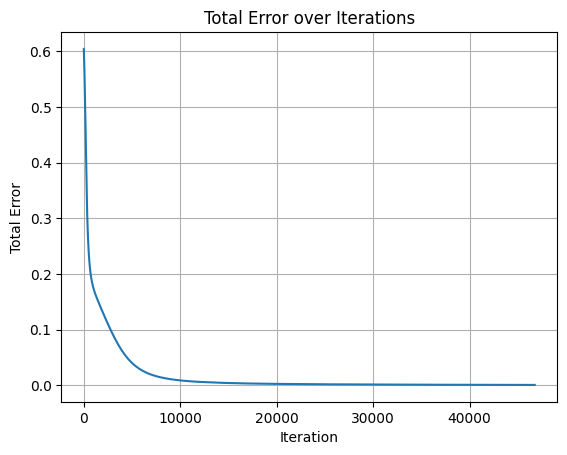

Final b3 value: tensor([-1.1124], requires_grad=True)
Final b4 value: tensor([-1.7009], requires_grad=True)
Final b5 value: tensor([-3.3723], requires_grad=True)
Final w_13 value: tensor([1.1124, 0.7052], requires_grad=True)
Final w_14 value: tensor([1.7009, 0.3393], requires_grad=True)
Final w_23 value: tensor([1.1124, 0.8069], requires_grad=True)
Final w_24 value: tensor([1.7009, 0.5113], requires_grad=True)
Final w_35 value: tensor([1.9283, 0.6840], requires_grad=True)
Final w_45 value: tensor([2.8420, 0.6208], requires_grad=True)


In [7]:
import torch
import random
import matplotlib.pyplot as plt

# Define input data and target 
x_1 = torch.tensor([1.0, 1.0, 0.0, 0.0], dtype=torch.float32)
x_2 = torch.tensor([1.0, 0.0, 1.0, 0.0], dtype=torch.float32)
y = torch.tensor([1, 0, 0, 0], dtype=torch.float32)

# Initialize weights and biases
w_13 = torch.tensor([random.random(), random.random()], dtype=torch.float32, requires_grad=True)
w_14 = torch.tensor([random.random(), random.random()], dtype=torch.float32, requires_grad=True)
w_23 = torch.tensor([random.random(), random.random()], dtype=torch.float32, requires_grad=True)
w_24 = torch.tensor([random.random(), random.random()], dtype=torch.float32, requires_grad=True)
w_35 = torch.tensor([random.random(), random.random()], dtype=torch.float32, requires_grad=True)
w_45 = torch.tensor([random.random(), random.random()], dtype=torch.float32, requires_grad=True)

b_3 = torch.tensor([random.random()], dtype=torch.float32, requires_grad=True)
b_4 = torch.tensor([random.random()], dtype=torch.float32, requires_grad=True)
b_5 = torch.tensor([random.random()], dtype=torch.float32, requires_grad=True)

# Learning rate
learning_rate = 0.01

# Training loop
erro_totais = []
k = 0
while k < 50000 and erro_total > 0.001:
    # Initialize gradients
    w_13.grad = torch.zeros_like(w_13)
    w_14.grad = torch.zeros_like(w_14)
    w_23.grad = torch.zeros_like(w_23)
    w_24.grad = torch.zeros_like(w_24)
    w_35.grad = torch.zeros_like(w_35)
    w_45.grad = torch.zeros_like(w_45)
    b_3.grad = torch.zeros_like(b_3)
    b_4.grad = torch.zeros_like(b_4)
    b_5.grad = torch.zeros_like(b_5)

    # Forward pass
    z_3 = w_13[0]*x_1 + w_23[0]*x_2 + b_3[0]
    a_3 = torch.relu(z_3)

    z_4 = w_14[0]*x_1 + w_24[0]*x_2 + b_4[0]
    a_4 = torch.relu(z_4)

    z_5 = w_35[0]*a_3 + w_45[0]*a_4 + b_5[0]
    a_5 = torch.sigmoid(z_5)

    # Calculate loss
    loss = torch.sum((y - a_5)**2) / 4

    # Backward pass
    loss.backward()

    # Update weights and biases
    with torch.no_grad():
        w_13 -= learning_rate * w_13.grad
        w_14 -= learning_rate * w_14.grad
        w_23 -= learning_rate * w_23.grad
        w_24 -= learning_rate * w_24.grad
        w_35 -= learning_rate * w_35.grad
        w_45 -= learning_rate * w_45.grad
        b_3 -= learning_rate * b_3.grad
        b_4 -= learning_rate * b_4.grad
        b_5 -= learning_rate * b_5.grad

    # Store total error for plotting
    erro_total = torch.sum((y - a_5)**2) / 4
    erro_totais.append(erro_total.item())

    k = k + 1
    # Print and monitor progress
    if k % 1000 == 0:
        print(f"Iteration {k}, Error: {erro_total.item()}")

# Plotting error over iterations
plt.figure()
plt.plot(erro_totais)
plt.xlabel("Iteration")
plt.ylabel("Total Error")
plt.title("Total Error over Iterations")
plt.grid(True)
plt.show()

# Print final weights and biases
print(f'Final b3 value: {b_3}')
print(f'Final b4 value: {b_4}')
print(f'Final b5 value: {b_5}')
print(f'Final w_13 value: {w_13}')
print(f'Final w_14 value: {w_14}')
print(f'Final w_23 value: {w_23}')
print(f'Final w_24 value: {w_24}')
print(f'Final w_35 value: {w_35}')
print(f'Final w_45 value: {w_45}')